In [1]:
# p297 오토 인코더
from tensorflow.keras.datasets import mnist
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt
import numpy as np
import os
os.environ['KMP_DUPLICATE_LIB_OK']='TRUE'

In [3]:
# mnist 데이터 불러오기
# 정확도 측정할게 아니고 특징만 뽑을거기때문에 y값 필없음
(X_train, _), (X_test, _) = mnist.load_data()
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype(float) / 255
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype(float) / 255

In [4]:
# 모델 만들기 (인코더와 디코더로)
autoencoder = models.Sequential()

# encoder
autoencoder.add(layers.Conv2D(16, kernel_size=3, padding='same', input_shape=(28, 28, 1), activation='relu'))
autoencoder.add(layers.MaxPooling2D(pool_size=2, padding='same'))
autoencoder.add(layers.Conv2D(8, kernel_size=3, padding='same', activation='relu'))
autoencoder.add(layers.MaxPooling2D(pool_size=2, padding='same'))
autoencoder.add(layers.Conv2D(8, kernel_size=3, padding='same', activation='relu', strides=2))

# decoder
autoencoder.add(layers.Conv2D(8, kernel_size=3, padding='same', activation='relu'))
autoencoder.add(layers.UpSampling2D())
autoencoder.add(layers.Conv2D(8, kernel_size=3, padding='same', activation='relu'))
autoencoder.add(layers.UpSampling2D())
autoencoder.add(layers.Conv2D(16, kernel_size=3, activation='relu'))
autoencoder.add(layers.UpSampling2D())
# 그림 만들기
autoencoder.add(layers.Conv2D(1, kernel_size=3, padding='same', activation='sigmoid'))

In [5]:
autoencoder.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 16)        160       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 8)         1160      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 8)          0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 8)           584       
                                                                 
 conv2d_3 (Conv2D)           (None, 4, 4, 8)           5

In [9]:
autoencoder.compile(loss='binary_crossentropy', optimizer='adam')
autoencoder.fit(X_train, X_train, epochs=50, batch_size=128, validation_data=(X_test, X_test))

Epoch 1/50
469/469 [==============================] - 71s 149ms/step - loss: 0.2067 - val_loss: 0.1386
Epoch 2/50
469/469 [==============================] - 104s 222ms/step - loss: 0.1282 - val_loss: 0.1190
Epoch 3/50
469/469 [==============================] - 67s 142ms/step - loss: 0.1157 - val_loss: 0.1113
Epoch 4/50
469/469 [==============================] - 67s 142ms/step - loss: 0.1093 - val_loss: 0.1060
Epoch 5/50
469/469 [==============================] - 78s 166ms/step - loss: 0.1052 - val_loss: 0.1024
Epoch 6/50
469/469 [==============================] - 78s 167ms/step - loss: 0.1024 - val_loss: 0.0999
Epoch 7/50
469/469 [==============================] - 56s 119ms/step - loss: 0.1003 - val_loss: 0.0978
Epoch 8/50
469/469 [==============================] - 50s 106ms/step - loss: 0.0986 - val_loss: 0.0964
Epoch 9/50
469/469 [==============================] - 53s 112ms/step - loss: 0.0971 - val_loss: 0.0957
Epoch 10/50
469/469 [==============================] - 79s 168ms/step - 

KeyboardInterrupt: 

313/313 [==============================] - 1s 3ms/step


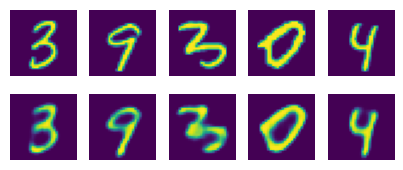

In [11]:
# 학습 결과 출력
random_test = np.random.randint(X_test.shape[0], size=5)
# 테스트 이미지 랜덤 호출
ae_imgs = autoencoder.predict(X_test) # 앞서 만든 오토인코더 모델에 넣기
plt.figure(figsize=(7,2)) # 출력 이미지의 크기를 정합니다.

for i, image_idx in enumerate(random_test):
    #랜덤으로 뽑은 이미지를 차례로 나열합니다.
    ax = plt.subplot(2, 7, i+1)
    #테스트할 이미지를 먼저 그대로 보여줍니다.
    plt.imshow(X_test[image_idx].reshape(28, 28))
    ax.axis('off')
    ax = plt.subplot(2, 7, 7+i+1)
    #오토인코딩 결과를 다음 열에 입력합니다.
    plt.imshow(ae_imgs[image_idx].reshape(28,28))
    ax.axis('off')
plt.show()